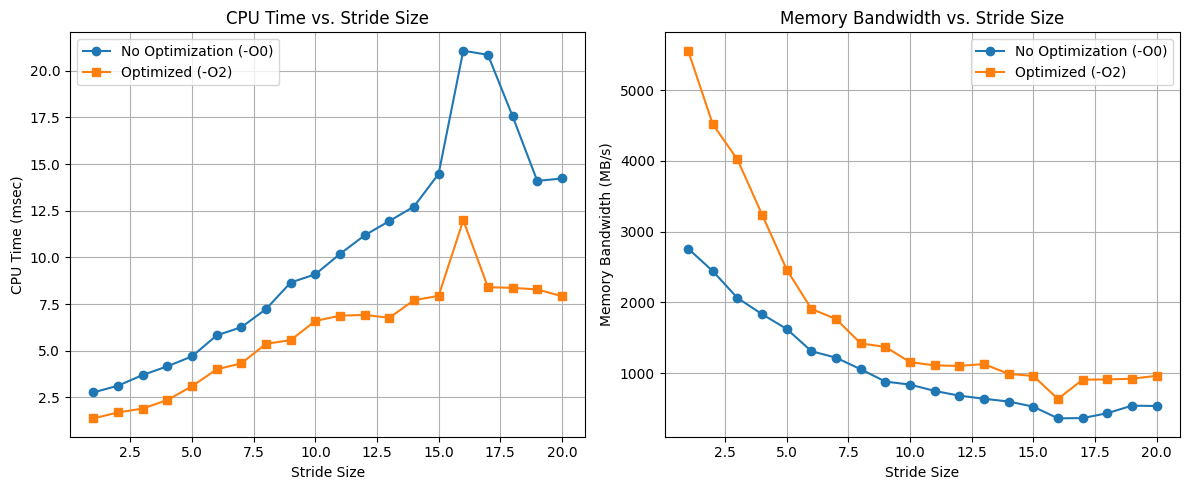

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_no_opt = "code_1.csv"  # Replace with actual filename
file_opt = "code_2.csv"  # Replace with actual filename

df_no_opt = pd.read_csv(file_no_opt)
df_opt = pd.read_csv(file_opt)

# Plot CPU Time vs. Stride Size
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(df_no_opt["stride"], df_no_opt["time (msec)"], label="No Optimization (-O0)", marker='o')
axes[0].plot(df_opt["stride"], df_opt["time (msec)"], label="Optimized (-O2)", marker='s')
axes[0].set_xlabel("Stride Size")
axes[0].set_ylabel("CPU Time (msec)")
axes[0].set_title("CPU Time vs. Stride Size")
axes[0].legend()
axes[0].grid()

# Plot Memory Bandwidth vs. Stride Size
axes[1].plot(df_no_opt["stride"], df_no_opt["rate (MB/s)"], label="No Optimization (-O0)", marker='o')
axes[1].plot(df_opt["stride"], df_opt["rate (MB/s)"], label="Optimized (-O2)", marker='s')
axes[1].set_xlabel("Stride Size")
axes[1].set_ylabel("Memory Bandwidth (MB/s)")
axes[1].set_title("Memory Bandwidth vs. Stride Size")
axes[1].legend()
axes[1].grid()

plt.tight_layout()

plt.show()


##Interepretation

# Exercice 2

This is the mxm.c file:

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define N 500 // Adjust size as needed

void matrix_multiply_standard(double a[N][N], double b[N][N], double c[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            c[i][j] = 0.0;
            for (int k = 0; k < N; k++) {
                c[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

void matrix_multiply_optimized(double a[N][N], double b[N][N], double c[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int k = 0; k < N; k++) {
            double temp = a[i][k]; // Reduce cache misses
            for (int j = 0; j < N; j++) {
                c[i][j] += temp * b[k][j];
            }
        }
    }
}

double get_time() {
    return (double)clock() / CLOCKS_PER_SEC;
}

int main() {
    static double a[N][N], b[N][N], c[N][N];
    
    // Initialize matrices with random values
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            a[i][j] = (double)(rand() % 10);
            b[i][j] = (double)(rand() % 10);
            c[i][j] = 0.0;
        }
    }

    // Measure execution time for standard multiplication
    double start = get_time();
    matrix_multiply_standard(a, b, c);
    double end = get_time();

    double time_taken = (end - start) * 1000.0; // Convert to milliseconds
    double memory_bandwidth = (3.0 * N * N * sizeof(double) * 1000.0) / (time_taken * 1024 * 1024); // MB/s

    printf("Standard Multiplication Time: %f ms\n", time_taken);
    printf("Memory Bandwidth: %f MB/s\n", memory_bandwidth);
    printf("-------------------------\n");

    // Measure execution time for optimized multiplication
    start = get_time();
    matrix_multiply_optimized(a, b, c);
    end = get_time();

    time_taken = (end - start) * 1000.0; // Convert to milliseconds
    memory_bandwidth = (3.0 * N * N * sizeof(double) * 1000.0) / (time_taken * 1024 * 1024); // MB/s

    printf("Optimized Multiplication Time: %f ms\n", time_taken);
    printf("Memory Bandwidth: %f MB/s\n", memory_bandwidth);

    return 0;
}


### Output : 
```shell
@SamiAGOURRAM ➜ /workspaces/codespaces-blank $ gcc -O2 -o mxm mxm.c -lm
@SamiAGOURRAM ➜ /workspaces/codespaces-blank $ ./mxm

Standard Multiplication Time: 143.481000 ms
Memory Bandwidth: 39.880165 MB/s

Optimized Multiplication Time: 54.357000 ms
Memory Bandwidth: 105.267875 MB/s

Exercice 3 : 

Code :


```c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define N 500  // Matrix size (adjustable)
#define BLOCK_SIZE 25  // Default block size (will be varied)

void matrix_multiply_block(double a[N][N], double b[N][N], double c[N][N], int B) {
    for (int i = 0; i < N; i += B) {
        for (int j = 0; j < N; j += B) {
            for (int k = 0; k < N; k += B) {
                // Compute block multiplication
                for (int ii = i; ii < i + B && ii < N; ii++) {
                    for (int jj = j; jj < j + B && jj < N; jj++) {
                        for (int kk = k; kk < k + B && kk < N; kk++) {
                            c[ii][jj] += a[ii][kk] * b[kk][jj];
                        }
                    }
                }
            }
        }
    }
}

double get_time() {
    return (double)clock() / CLOCKS_PER_SEC;
}

int main() {
    static double a[N][N], b[N][N], c[N][N];

    // Initialize matrices with random values
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            a[i][j] = (double)(rand() % 10);
            b[i][j] = (double)(rand() % 10);
            c[i][j] = 0.0;
        }
    }

    int block_sizes[] = {5, 10, 25, 50, 100};  // Test different block sizes

    printf("Block Size, Execution Time (ms), Memory Bandwidth (MB/s)\n");
    
    for (int b = 0; b < 5; b++) {
        int B = block_sizes[b];

        double start = get_time();
        matrix_multiply_block(a, b, c, B);
        double end = get_time();

        double time_taken = (end - start) * 1000.0; // Convert to milliseconds
        double memory_bandwidth = (3.0 * N * N * sizeof(double) * 1000.0) / (time_taken * 1024 * 1024); // MB/s

        printf("%d, %f, %f\n", B, time_taken, memory_bandwidth);
    }

    return 0;
}


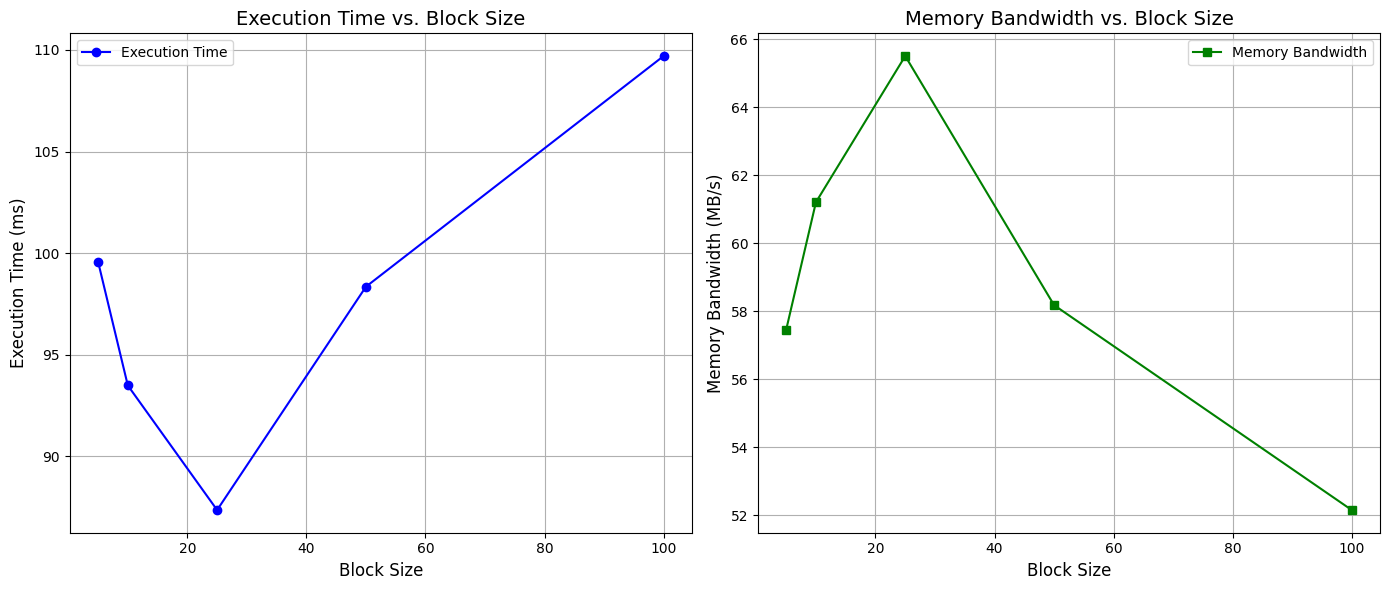

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'results.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

# Ensure the required columns exist
required_columns = ['Block Size', ' Execution Time (ms)', ' Memory Bandwidth (MB/s)']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The CSV file must contain the following columns: {required_columns}")

# Extract the data
block_sizes = data['Block Size']
execution_times = data[' Execution Time (ms)']
memory_bandwidths = data[' Memory Bandwidth (MB/s)']

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Figure 1: Execution Time vs. Block Size
axes[0].plot(block_sizes, execution_times, marker='o', color='blue', label='Execution Time')
axes[0].set_title('Execution Time vs. Block Size', fontsize=14)
axes[0].set_xlabel('Block Size', fontsize=12)
axes[0].set_ylabel('Execution Time (ms)', fontsize=12)
axes[0].grid(True)
axes[0].legend()

# Figure 2: Memory Bandwidth vs. Block Size
axes[1].plot(block_sizes, memory_bandwidths, marker='s', color='green', label='Memory Bandwidth')
axes[1].set_title('Memory Bandwidth vs. Block Size', fontsize=14)
axes[1].set_xlabel('Block Size', fontsize=12)
axes[1].set_ylabel('Memory Bandwidth (MB/s)', fontsize=12)
axes[1].grid(True)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Exercice 04

## Issues Identified
Memory Leak in duplicate_array:
The duplicate array (array_copy) is allocated memory but is never freed in main.

Incomplete free_memory Function:
The function is defined but does not call free(arr), so even the original array memory is not released as intended.

## Changes to Be Made
. Implement free_memory

. Free the Duplicate Array:
In main, add a call to free the memory allocated for array_copy.

Corrected code 

```c
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#define SIZE 5

// Function to allocate an array of integers
int* allocate_array(int size) {
    int *arr = (int *) malloc(size * sizeof(int));
    if (!arr) {
        fprintf(stderr, "Memory allocation failed\n");
        exit(EXIT_FAILURE);
    }
    return arr;
}

// Function to initialize the array with values
void initialize_array(int *arr, int size) {
    if (!arr) return; // Avoid segmentation fault
    for (int i = 0; i < size; i++) {
        arr[i] = i * 10;
    }
}

// Function to print the array
void print_array(int *arr, int size) {
    if (!arr) return; // Avoid segmentation fault
    printf("Array elements: ");
    for (int i = 0; i < size; i++) {
        printf("%d ", arr[i]);
    }
    printf("\n");
}

// Function to create a duplicate of the array
int* duplicate_array(int *arr, int size) {
    if (!arr) return NULL;
    int *copy = (int *) malloc(size * sizeof(int));
    if (!copy) {
        fprintf(stderr, "Memory allocation failed\n");
        exit(EXIT_FAILURE);
    }
    // Copy values
    memcpy(copy, arr, size * sizeof(int));
    return copy;
}

// Function to free the allocated memory
void free_memory(int *arr) {
    free(arr);
}

// Main function
int main() {
    int *array = allocate_array(SIZE);
    initialize_array(array, SIZE);
    print_array(array, SIZE);

    // Creating a duplicate array
    int *array_copy = duplicate_array(array, SIZE);
    print_array(array_copy, SIZE);

    // Free memory for both arrays
    free_memory(array);
    free_memory(array_copy);

    return 0;
}
